# Linear Models

* Use `scikit learn` to run a linear regression both to explore the relationship between two variables *and* for prediction.
* Implement **bootstrapping** in Python.
* Interpret the outputs of models in Python using your conceptual understanding of regression.

## Part I: Regression for data exploration & description

First, we'll look at a data that contains information about the size of various species' brains and the number of neurons that they have! This data is from [Suzana Herculano-Houzel, a Brazilian neuroscientist](https://suzanaherculanohouzel.com/about/).

<img src="https://www.frontiersin.org/files/Articles/857/fnhum-03-031/image_n/fnhum-03-031-g004.gif" alt="image" width="400"/>

[Image source](https://www.frontiersin.org/articles/10.3389/neuro.09.031.2009/full)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('Data/species_brainmass_neurons.csv')
df = df[df['Order']=='Primata']
df.head()

,Species,Order,cortex_mass_g,Neurons,Other_cells,Neurons_mg,Other_cells_mg,Source
11,Microcebus murinus,Primata,0.908,22310400,70649600,24571,77808,"Gabi et al., 2010"
19,Callithrix jacchus,Primata,5.561,244720000,395340000,44280,71800,"Herculano-Houzel et al., 2007"
20,Otolemur garnetti,Primata,6.290,226090000,402070000,37820,63610,"Herculano-Houzel et al., 2007"
24,Aotus trivirgatus,Primata,10.617,441900000,695420000,41990,65330,"Herculano-Houzel et al., 2007"
25,Callimico goeldii,Primata,12.984,357129180,715330820,27505,55093,"Gabi et al., 2010"



<div class="alert alert-success"><b>Task</b>: Inspect the Pearson correlation and visual relationship between the mass of the cortex and the number of neurons.</div>

0.9510144650738591 6.949875539863893e-06


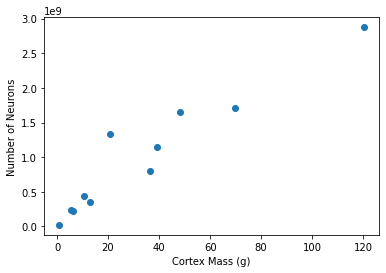

In [2]:
# Pearsons correlation
r, p = stats.pearsonr(df['cortex_mass_g'], df['Neurons'])
print(r,p)

# Plot
plt.scatter(df['cortex_mass_g'], df['Neurons'])
plt.xlabel('Cortex Mass (g)')
plt.ylabel('Number of Neurons')
plt.show()

Below, we'll use [`LinearRegression`](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) from `sklearn` to fit our model and add both the predicted # of neurons *and* the residuals to our dataframe.

In [3]:
from sklearn.linear_model import LinearRegression

# 1 - Initialize the kind of model
model = LinearRegression()

# 2 - Fit the model
model.fit(df[['cortex_mass_g']],df['Neurons'])

# 3 - Predict the values of "Neurons" based on "cortex_mass_g"
df['Neurons Prediction'] = model.predict(df[['cortex_mass_g']])

# 4 - Calculate the residuals
df['Residuals'] = df['Neurons'] - df['Neurons Prediction']

df.head()

,Species,Order,cortex_mass_g,Neurons,Other_cells,Neurons_mg,Other_cells_mg,Source,Neurons Prediction,Residuals
11,Microcebus murinus,Primata,0.908,22310400,70649600,24571,77808,"Gabi et al., 2010",2.292483e+08,-2.069379e+08
19,Callithrix jacchus,Primata,5.561,244720000,395340000,44280,71800,"Herculano-Houzel et al., 2007",3.362016e+08,-9.148158e+07
20,Otolemur garnetti,Primata,6.290,226090000,402070000,37820,63610,"Herculano-Houzel et al., 2007",3.529583e+08,-1.268683e+08
24,Aotus trivirgatus,Primata,10.617,441900000,695420000,41990,65330,"Herculano-Houzel et al., 2007",4.524182e+08,-1.051817e+07
25,Callimico goeldii,Primata,12.984,357129180,715330820,27505,55093,"Gabi et al., 2010",5.068257e+08,-1.496966e+08


Let's take a look at the predicted values and some important outputs from the modeling:

Coefficients: 
 [22985876.15644853]
Intercept: 
 208377119.0238999
Mean squared error: 64914514578500456.00
Coefficient of determination: 0.90


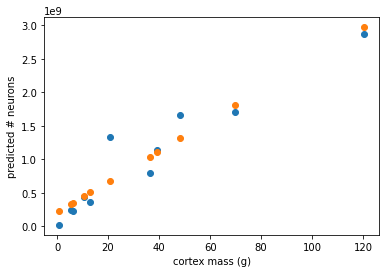

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(df['Neurons'], df['Neurons Prediction']))
print("Coefficient of determination: %.2f" % r2_score(df['Neurons'], df['Neurons Prediction']))

plt.scatter(df['cortex_mass_g'],df['Neurons'])
plt.scatter(df['cortex_mass_g'],df['Neurons Prediction'])
plt.xlabel('cortex mass (g)')
plt.ylabel('predicted # neurons')
plt.show()

Hmm, this doesn't seem like a great predictor in the entire dataset!

<div class="alert alert-success"><b>Task</b>: Run the same analysis above, fitting a linear model, but do so with *only* the primates in the data (<code>df['Order']=='Primata'</code>). Is the relationship between # of neurons and cortex size in the primate data better described by a linear fit?</div>

### Bootstrapping to assess uncertainty

We can choose random samples from our data as well. 

<div class="alert alert-success"><b>Task</b>: Finish the function below (replace the <code>...</code> to implement bootstrapping.

Hint: <code><a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html">np.random.choice</a></code> will definitely be useful here! Note the "replace" argument. Then, plot the randomly sampled data.
    </div>

In [5]:
def resample_with_replacement(x, y):
    """Resample data points with replacement from the dataset of `x` inputs and `y` measurements.

    Args: **note** adjusted to reflect series!
    
        x (series): Pandas series (column) that contains the input values.
        y (series): Pandas series (column) that contains the corresponding measurement values to the inputs.

    Returns:
        ndarray, ndarray: The newly resampled `x` and `y` data points.
    """

    # Get array of indices for resampled points
    sample_idx = np.random.choice(len(x),size=len(x),replace=True)

    # Sample from x and y according to sample_idx
    x_ = x.iloc[sample_idx]
    y_ = y.iloc[sample_idx]

    return x_, y_

x_, y_ = resample_with_replacement(df['cortex_mass_g'],df['Neurons'])

(Note that some of the data may be plotted over other data, because we are allowing resampling!) 

Now, we can implement a method to run the bootstrap process of generating a set of values from a dataset of inputs (x) and measurements (y).

We'll use the `resample_with_replacement` function here, and we'll also choose estimates by minimizing the **mean square error** using least squares optimization in this line of code: `estimates[i] = (x_.T @ y_) / (x_.T @ x_)`. **Note**: We will not fully explore the derivation of this equation in this course; if you're curious, see [this tutorial](https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial1.html#section-2-least-squares-optimization).

In [6]:
def bootstrap_estimates(x, y, n=2000):
    """Generate a set of theta_hat estimates using the bootstrap method.

    Args:
        x (ndarray): An array of shape (samples,) that contains the input values.
        y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
        n (int): The number of estimates to compute

    Returns:
        ndarray: An array of estimated parameters with size (n,)
  """

    estimates = np.zeros(n)

    # Loop over number of estimates
    for i in range(n):

        # Resample x and y
        x_, y_ = resample_with_replacement(x, y)

        # Compute theta_hat (estimated parameters) for this sample
        estimates[i] = (x_.T @ y_) / (x_.T @ x_)

    return estimates

# Set random seed (optional)
#np.random.seed(123)

# Get bootstrap estimates
estimates = bootstrap_estimates( df['cortex_mass_g'], df['Neurons'],n=2000)
print(estimates[0:5])
print(f"mean = {np.mean(estimates):.2f}, std = {np.std(estimates):.2f}")

[25121807.70410648 25678408.84137888 25229208.44198825 33971757.7917922
 24909875.08419665]
mean = 27101637.72, std = 3051099.94


Now that we have our bootstrap estimates, we can visualize all the potential models (models computed with different resampling) together to see how distributed they are.

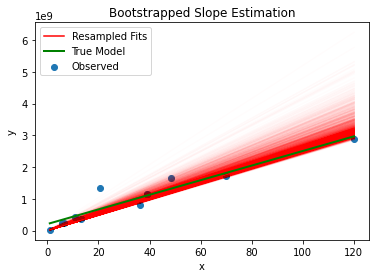

In [7]:
x = df['cortex_mass_g']
y = df['Neurons']

fig, ax = plt.subplots()

# For each estimate, plot model

for i, estimate in enumerate(estimates):
    y_hat = estimate * x
    ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = model.intercept_ + model.coef_ * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(title='Bootstrapped Slope Estimation', xlabel='x', ylabel='y')

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend()
plt.show()

Finally, we can quantify how uncertain our estimated slope is. We do so by computing [confidence intervals (CIs)](https://en.wikipedia.org/wiki/Confidence_interval) from our bootstrapped estimates. The most direct approach is to compute percentiles from the empirical distribution of bootstrapped estimates. Note that this approach is widely applicable -- it does not assume this distribution is Gaussian!

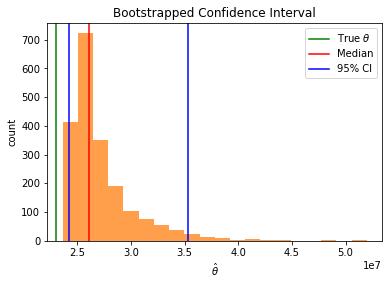

In [8]:
fig, ax = plt.subplots()
ax.hist(estimates, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(model.coef_, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(estimates, 50), color='r', label='Median')
ax.axvline(np.percentile(estimates, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(estimates, 97.5), color='b')
ax.legend()
ax.set(title='Bootstrapped Confidence Interval',xlabel=r'$\hat{{\theta}}$',ylabel='count')
plt.show()

## Part II: Regression for prediction

We can also use regression for prediction. Below, we'll use a dataset of **2-photon calcium imaging** to measure neural activity in mice while they're running on a wheel and viewing visual stimuli. We don't have access to the animal's performance on the task, but we can still use the animal's movement on the wheel (a very rich measure of arousal, actually!) as an interesting behavioral output.

First, let's get some data:

In [9]:
# Allen specific toolboxes
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

boc = BrainObservatoryCache(manifest_file='Data/manifest.json')

exps = boc.get_ophys_experiments(cre_lines=['Sst-IRES-Cre'], stimuli=['drifting_gratings'])

pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,603763073,325,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),102,603763385,three_session_A,323528,Sst-IRES-Cre;Ai148(CAM)-323528,True
1,581150104,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),121,579992884,three_session_A,296462,Sst-IRES-Cre;Ai148(CAM)-296462,False
2,607063420,275,VISl,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),103,606960910,three_session_A,327595,Sst-IRES-Cre;Ai148(CAM)-327595,False
3,688580172,275,VISl,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),105,686031104,three_session_A,377321,Sst-IRES-Cre;Ai148-377321,False
4,601273921,275,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),116,601273919,three_session_A,316777,Sst-IRES-Cre;Ai148(CAM)-316777,False
5,613968705,375,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),103,614418789,three_session_A,332396,Sst-IRES-Cre;Ai148(CAM)-332396,True
6,639117196,375,VISpm,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),97,639117194,three_session_A,340377,Sst-IRES-Cre;Ai148-340377,True
7,598635821,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),107,598635819,three_session_A,315559,Sst-IRES-Cre;Ai148(CAM)-315559,False
8,612044635,265,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),97,612044633,three_session_A,332395,Sst-IRES-Cre;Ai148(CAM)-332395,True
9,580163817,375,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),109,580163815,three_session_A,297507,Sst-IRES-Cre;Ai148(CAM)-297507,True


Now that we have our list of experiments in the Sst-IRES-Cre line, we can get the raw data for one of them. This will take a minute.

In [10]:
# Let's just look at the first session
session_id = exps[0]['id']
session_id = 613968705 # experiment with high prediction
data_set = boc.get_ophys_experiment_data(session_id)

Then, we can plot a mean of all of the fluorescence traces:

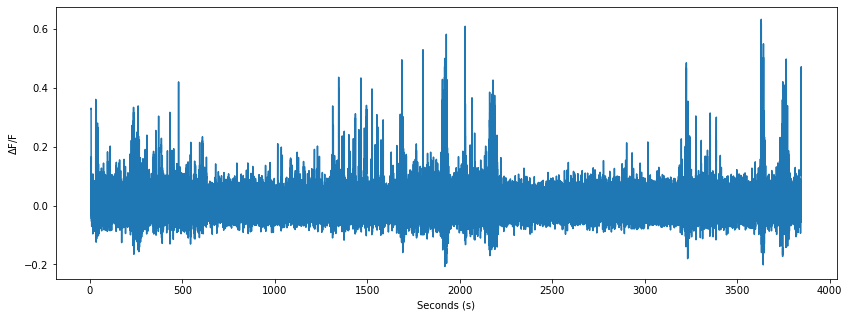

In [11]:
# Get all of the fluorescence traces (ts = timestamps; dff = deltaF/F)
ts, dff = data_set.get_dff_traces()

# Get the average change in fluorescence
dff_mean = dff.mean(axis=0)

# Plot the sum of all of the fluorescence activity
plt.figure(figsize=(14,5))
plt.plot(ts,dff_mean)
plt.xlabel('Seconds (s)')
plt.ylabel('$\Delta$F/F')
plt.show()

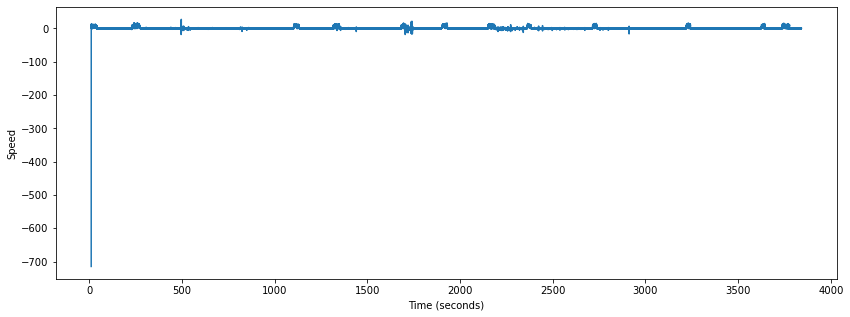

In [12]:
# Get the running speed from this dataset (dxcm = distance in cm; ts = timestamps)
dxcm, ts = data_set.get_running_speed()

# Plot it
plt.figure(figsize=(14,5))
plt.plot(ts,dxcm)
plt.xlabel('Time (seconds)')
plt.ylabel('Speed')
plt.show()

Running activity is fairly coarse, so rather than try to predict the activity at 30Hz, let's bin the activity (summed across all neurons) into bins of 5 seconds. We also need to get rid of ~NaN values.

/tmp/ipykernel_123/1175580642.py:11: RuntimeWarning: Mean of empty slice.
  run_bin[i] = dxcm[np.where((ts>i*bin_size)&(ts<((i+1)*bin_size)))].mean()
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_123/1175580642.py:12: RuntimeWarning: Mean of empty slice.
  response_bin[i] = dff_mean[np.where((ts>i*bin_size)&(ts<((i+1)*bin_size)))].mean()
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


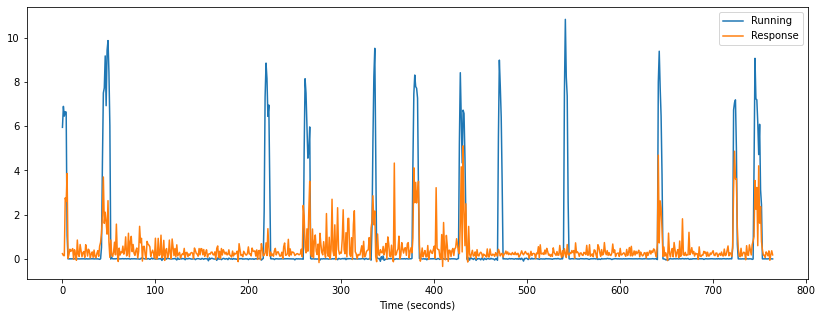

In [13]:
bin_size = 5
bin_stamps = np.arange(0,ts.max(),bin_size)
num_bins = len(bin_stamps)

run_bin = np.empty(num_bins)
response_bin = np.empty(num_bins)

for i in range(num_bins):
    
    # Get the values within our time bin and take a mean
    run_bin[i] = dxcm[np.where((ts>i*bin_size)&(ts<((i+1)*bin_size)))].mean() 
    response_bin[i] = dff_mean[np.where((ts>i*bin_size)&(ts<((i+1)*bin_size)))].mean()

response_bin = response_bin[~np.isnan(run_bin)]
run_bin = run_bin[~np.isnan(run_bin)]

# Scale the response trace so we can see it alongside running
response_bin_scaled = response_bin*40

# Plot it
plt.figure(figsize=(14,5))
plt.plot(run_bin,label='Running')
plt.plot(response_bin_scaled,label='Response')
plt.legend()
plt.xlabel('Time (seconds)')
plt.show()

<div class="alert alert-success"><b>Task</b>: Now that you have <code>response_bin</code> and <code>run_bin</code> we can ask a prediction question: does the animal's movement predict neural activity?
    
To answer this question, we'll devise a **training** set of the first 200 samples and see if we can use the coefficient predicted by a linear model to predict the remaining samples.
    
1. Run a linear regression on the first 200 samples. Obtain the coefficient from this linear regression.
2. Multiply the remaining samples by the coefficient to obtain a list of predicted values.
3. Plot these predicted values along side the actual response values.
4. Assess this prediction using both a Pearson's r and R^2 statistic.

</div>

Coefficient:  [0.00515133]


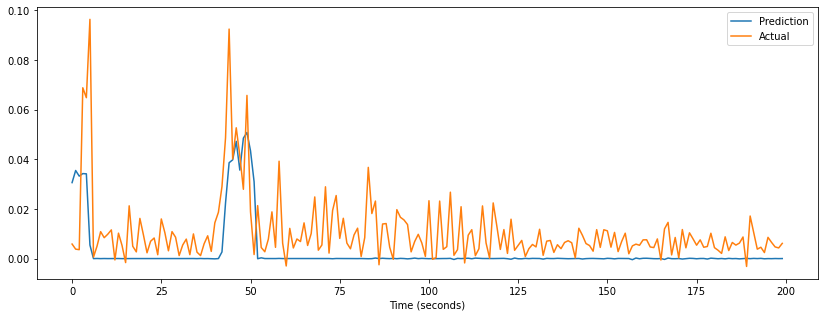

In [15]:
# 1 - Initialize the kind of model
model = LinearRegression()

# 2 - Fit the model
model.fit(run_bin[200:].reshape(-1,1),response_bin[200:])
print(f"Coefficient:  {model.coef_}")

# 3 - Predict
response_prediction = model.coef_ * run_bin[:200]
response_prediction_model = model.predict(run_bin[200:].reshape(-1,1))

# Plot it
plt.figure(figsize=(14,5))
plt.plot(response_prediction,label='Prediction')
plt.plot(response_bin[:200],label='Actual')
plt.legend()
plt.xlabel('Time (seconds)')
plt.show()

In [20]:
# Step 4: Assess model
print("Coefficient of determination (for training set): %.2f" % r2_score(response_bin[200:], response_prediction_model))

pearsons_r , pearsons_p = stats.pearsonr(response_bin[:200], response_prediction)
print("Pearson's r (for test): %f    pearson's p: %.20f" % (pearsons_r, pearsons_p))

Coefficient of determination (for training set): 0.31
Pearson's r (for test): 0.568941    pearson's p: 0.00000000000000000151


For this particular field of view, the R^2 isn't particularly high, but the model does well enough to give us a significant correlation between running and neural responses.

## About this notebook

Some of the material here was adapted from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial3.html). 